In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

скачаем dataset MNIST и разделим данные на трен. и тест.

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


стандартизация

In [5]:
x_train = x_train/255
x_test = x_test/255

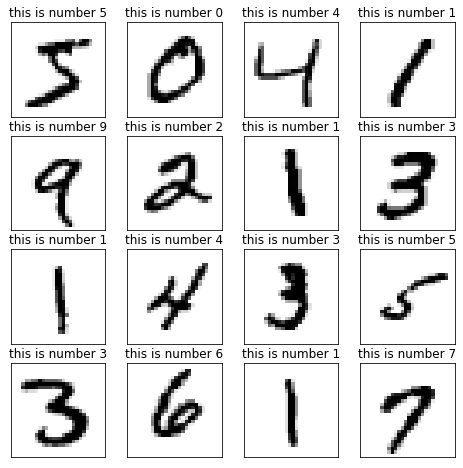

In [6]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap =plt.cm.binary)
  plt.title("this is number {}".format(y_train[i]))

Распознование цифр с помощью полносвязных сетей


In [7]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(128, activation = tf.nn.sigmoid),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [8]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
Model1 = model1.fit(x_train,y_train,batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.8859 - val_loss: 0.2395 - val_accuracy: 0.9341
Epoch 2/7
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2179 - accuracy: 0.9366 - val_loss: 0.1886 - val_accuracy: 0.9469
Epoch 3/7
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1634 - accuracy: 0.9517 - val_loss: 0.1545 - val_accuracy: 0.9549
Epoch 4/7
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1297 - accuracy: 0.9625 - val_loss: 0.1315 - val_accuracy: 0.9622
Epoch 5/7
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1044 - accuracy: 0.9697 - val_loss: 0.1199 - val_accuracy: 0.9658
Epoch 6/7
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0867 - accuracy: 0.9754 - val_loss: 0.1139 - val_accuracy: 0.9658
Epoch 7/7
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0726 - accuracy: 0.9799 - val_loss: 0.1036 - val_accuracy: 0.9687

проверим качество

In [11]:
print(model1.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.9703
[0.09950375556945801, 0.970300018787384]


наглядная проверка

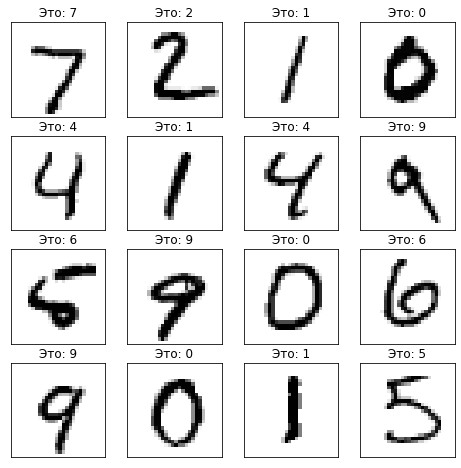

In [12]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model1.predict(x)

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")


график метрики

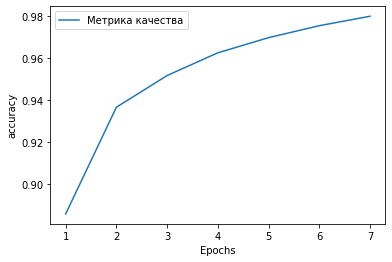

In [13]:
accu_values = Model1.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

График функции потерь

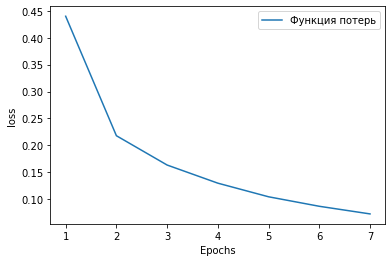

In [14]:
accu_values = Model1.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Вторая нейронка. Она реализована на свёрточных сетях

In [15]:
model2 =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model2.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [18]:
Model2 = model2.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=64, epochs=7, validation_split=0.2)

Epoch 1/7
750/750 [==============================] - 35s 47ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0497 - val_accuracy: 0.9863
Epoch 2/7
750/750 [==============================] - 35s 47ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0617 - val_accuracy: 0.9844
Epoch 3/7
750/750 [==============================] - 35s 47ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0564 - val_accuracy: 0.9852
Epoch 4/7
750/750 [==============================] - 35s 47ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0517 - val_accuracy: 0.9872
Epoch 5/7
750/750 [==============================] - 35s 47ms/step - loss: 9.1531e-04 - accuracy: 0.9999 - val_loss: 0.0477 - val_accuracy: 0.9884
Epoch 6/7
750/750 [==============================] - 35s 47ms/step - loss: 3.3411e-04 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9890
Epoch 7/7
750/750 [==============================] - 35s 47ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0583 - val_accuracy

In [19]:
print(model2.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.0574 - accuracy: 0.9867
[0.05735789239406586, 0.9866999983787537]


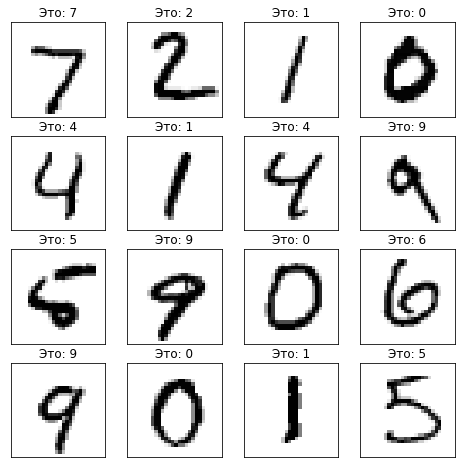

In [20]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model2.predict(x.reshape(-1, 28, 28, 1))

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")


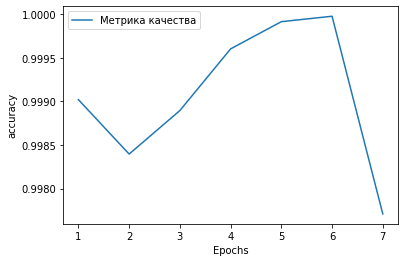

In [21]:
accu_values = Model2.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

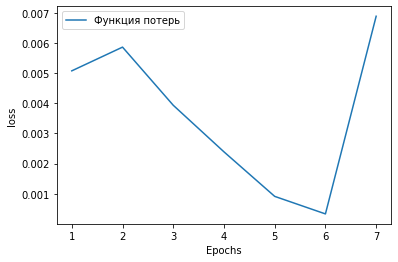

In [22]:
accu_values = Model2.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
model3 =  tf.keras.models.Sequential([
    #Первый коволюционный слой определяет прямые
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #Первый коволюционный слой определяет уже углы между этими прямыми
    tf.keras.layers.Conv2D( filters=64, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model3.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [25]:
Model3 = model3.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 64s 42ms/step - loss: 0.1380 - accuracy: 0.9577 - val_loss: 0.0461 - val_accuracy: 0.9866
Epoch 2/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0470 - val_accuracy: 0.9854
Epoch 3/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 4/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 5/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0419 - val_accuracy: 0.9900
Epoch 6/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0417 - val_accuracy: 0.9902
Epoch 7/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0504 - val_ac

In [26]:
print(model3.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))


313/313 [==============================] - 3s 10ms/step - loss: 0.0350 - accuracy: 0.9919
[0.034991804510354996, 0.9919000267982483]


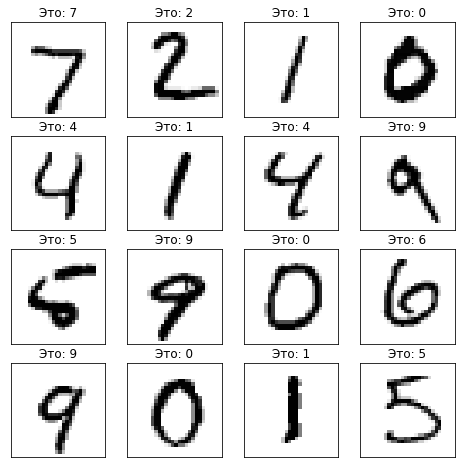

In [27]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model3.predict(x.reshape(-1, 28, 28, 1))

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")

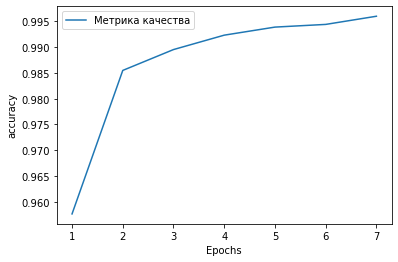

In [28]:
accu_values = Model3.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

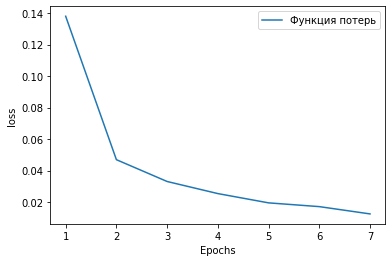

In [30]:
accu_values = Model3.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()